# AdaBoost
##Implementing AdaBoost on a Dataset
##Model Evaluation, Limitations & Use Cases

---

### Learning Objectives
By the end of this notebook, you will be able to:
- Implement AdaBoost using scikit-learn
- Understand the role of weak learners
- Interpret key parameters of AdaBoost
- Evaluate model performance properly
- Identify when AdaBoost should and should not be used


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading the Dataset
We use the Breast Cancer dataset because it is clean, binary, and well-suited for demonstrating boosting behavior.

In [52]:
from joblib.numpy_pickle import load
X, y = load_breast_cancer(return_X_y=True)

feature_names = load_breast_cancer().feature_names
print('Feature matrix shape:', X.shape)
print('Target vector shape:', y.shape)
print('Features Name', feature_names)

Feature matrix shape: (569, 30)
Target vector shape: (569,)
Features Name ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [53]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Training samples:', X_train.shape)
print('Testing samples:', X_test.shape)

Training samples: (426, 30)
Testing samples: (143, 30)


## Baseline Model: Decision Stump
Before boosting, we examine how a single weak learner performs.

In [54]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)
y_pred_stump = stump.predict(X_test)
print('Decision Stump Accuracy:', accuracy_score(y_test, y_pred_stump))

Decision Stump Accuracy: 0.8951048951048951


## 5. Building AdaBoost Model
Now we boost the weak learner using AdaBoost.

In [55]:
base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)

ada = AdaBoostClassifier(
    estimator = base_learner,
    n_estimators= 20,
    learning_rate= 0.3,
    random_state= 42
)

ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.3, n_estimators=20, random_state=42)

**AdaBoostClassifier**

class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, random_state=None)

**Parameters:**
* estimator: object, default=None

The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.

* n_estimatorsint, default=50

The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).

* learning_rate: float, default=1.0

Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range (0.0, inf).

* random_state: int, RandomState instance or None, default=None

Controls the random seed given at each estimator at each boosting iteration. Thus, it is only used when estimator exposes a random_state. Pass an int for reproducible output across multiple function calls

In [56]:
# Predict
y_pred_ada = ada.predict(X_test)
print('AdaBoost Accuracy: ', accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy:  0.965034965034965


In [57]:
# Evaluation
print(classification_report(y_test, y_pred_ada))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Confusion Matrix:
 [[51  3]
 [ 2 87]]


## Effect of Number of Estimators
We now observe how the number of weak learners affects performance.

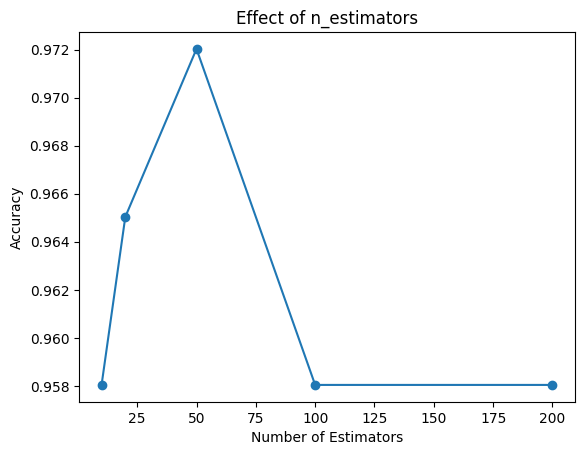

In [58]:
#Effect of Number of Estimators
estimators = [10,20,50,100,200]
accs = []
for n in estimators:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = n,
      learning_rate = 0.3,
      random_state = 42
  )
  model.fit(X_train,y_train)
  accs.append(accuracy_score(y_test,model.predict(X_test)))


plt.plot(estimators, accs, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators')
plt.show()

# So  here n_estimator = 50 gives highest accuracy

## Effect of Learning Rate
Learning rate controls how strongly each learner contributes.

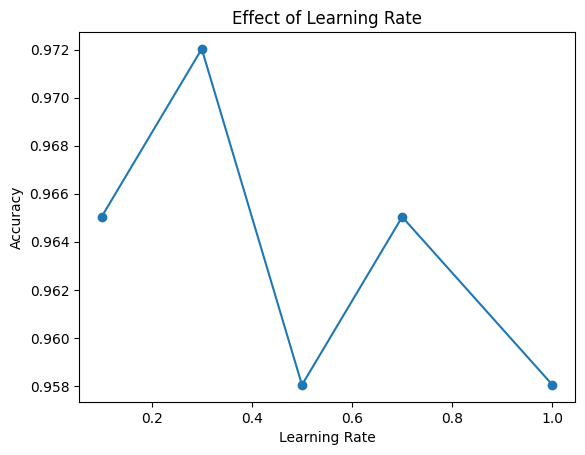

In [59]:
#Effect of Learning Rate
rates = [0.1, 0.3, 0.5, 0.7, 1.0]
accs_lr = []

for lr in rates:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = 50,
      learning_rate = lr,
      random_state = 42
  )
  model.fit(X_train,y_train)
  accs_lr.append(accuracy_score(y_test,model.predict(X_test)))


plt.plot(rates, accs_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate')
plt.show()
# Here learning_rate 0.3 gives the highest accuracy

## GridSearchCV
We can try to find the optimal parameters through GridSearchCV here.


In [60]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for AdaBoost
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
    'estimator__max_depth': [1, 2]
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=AdaBoostClassifier(estimator=base_learner, random_state=42),
    param_grid = param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Run grid search
grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("Best Parameters Found:")
print(grid.best_params_)
print("\nTest Accuracy (GridSearch AdaBoost):",
      accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Best Parameters Found:
{'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 200}

Test Accuracy (GridSearch AdaBoost): 0.9790209790209791

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Limitations and Use Cases
AdaBoost performs well on clean data but struggles with heavy noise and outliers.

## Applying AdaBoost, taking Random Forest as base model

In [61]:
# AdaBoost Model using Random Forest
base_learner_rf = RandomForestClassifier(n_estimators=10, random_state=42)

ada_rf = AdaBoostClassifier(
    estimator = base_learner_rf,
    n_estimators=50,
    learning_rate= 0.3,
    random_state= 42
)

ada_rf.fit(X_train, y_train)

y_pred_ada_rf = ada_rf.predict(X_test)
print('AdaBoost Accuracy: ', accuracy_score(y_test, y_pred_ada_rf))

print(classification_report(y_test, y_pred_ada_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ada_rf))

AdaBoost Accuracy:  0.951048951048951
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Confusion Matrix:
 [[51  3]
 [ 4 85]]


## Applying AdaBoost, taking Support Vector Machine(SVM) as base model

In [62]:
# AdaBoost Model using SVM
base_learner_svm = SVC(kernel='linear', C=1.0, random_state=42)

ada_svm = AdaBoostClassifier(
    estimator = base_learner_svm,
    n_estimators= 50,
    learning_rate= 0.3,
    random_state=42
)

ada_svm.fit(X_train, y_train)

y_pred_ada_svm = ada_rf.predict(X_test)
print('AdaBoost Accuracy: ', accuracy_score(y_test, y_pred_ada_svm))

print(classification_report(y_test, y_pred_ada_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ada_svm))

AdaBoost Accuracy:  0.951048951048951
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Confusion Matrix:
 [[51  3]
 [ 4 85]]



## Feature Importance

AdaBoost using **DecisionTree and Random Forest** provides **global feature importance**.
This tells us which features were most useful overall.


In [63]:
# For DecisionTree(AdaBoosting)

print("DecisionTree(AdaBoosting)")
importances_ada = pd.Series(
    ada.feature_importances_,
    index = feature_names
).sort_values(ascending=False)

display(importances_ada.head(10))
print()

# For Random Forest(AdaBoosting)

print("Random Forest(AdaBoosting)")
importances_ada_rf = pd.Series(
    ada_rf.feature_importances_,
    index = feature_names
).sort_values(ascending=False)

display(importances_ada_rf.head(10))

DecisionTree(AdaBoosting)


,0
worst concave points,0.233845
worst area,0.150353
mean concave points,0.144722
worst perimeter,0.101409
worst texture,0.091674
worst radius,0.080450
mean texture,0.070975
worst concavity,0.049270
area error,0.045925
radius error,0.031377



Random Forest(AdaBoosting)


,0
worst perimeter,0.169065
mean concave points,0.139202
worst radius,0.132295
worst concave points,0.129554
worst area,0.080897
mean concavity,0.057495
mean area,0.038607
worst concavity,0.033896
worst texture,0.025815
radius error,0.018973


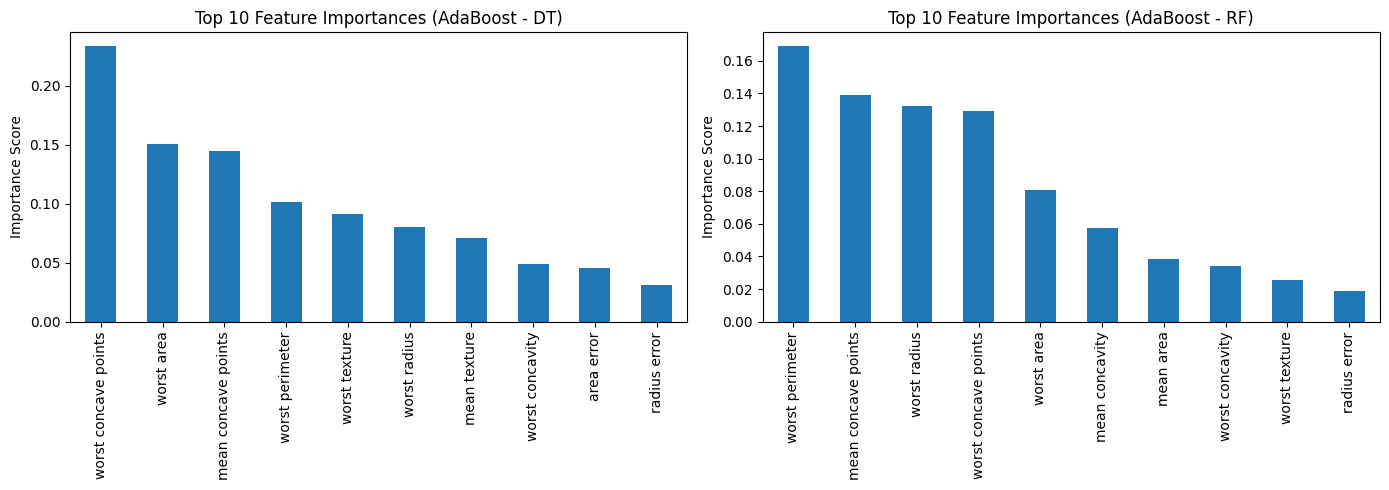

In [64]:
#Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

importances_ada.head(10).plot(kind="bar", ax=axes[0])
axes[0].set_title("Top 10 Feature Importances (AdaBoost - DT)")
axes[0].set_ylabel("Importance Score")

importances_ada_rf.head(10).plot(kind="bar", ax=axes[1])
axes[1].set_title("Top 10 Feature Importances (AdaBoost - RF)")
axes[1].set_ylabel("Importance Score")

plt.tight_layout()
plt.show()
